____

<font size=+4 color=#AA55FF> ICA: Support Vector Machines </font>

____

In this ICA you will do a complete classification project with a focus on support vector machines. The focus will be on kernels, hyperparameter tuning and classification boundaries.

First, there are a few libraries I would like to draw your attention to. Take a moment to read about these and discuss with your group how you might use them. They could be really useful in your projects. Each of them provides visualization capabilities specifically for machine learning applications. 

* [seaborn](https://seaborn.pydata.org), [Plotly](https://plotly.com), [Bokeh](http://bokeh.org); these you certainly already know and use!
* [streamlit](https://streamlit.io); some of you have built DS and ML apps with this
* [yellowbrick](https://www.scikit-yb.org/en/latest/); many ML-specific tools
* [mlextend](https://rasbt.github.io/mlxtend/); great for classification boundaries and _is what we will use today_
* [tensorboard](https://www.tensorflow.org/tensorboard); very useful for Tensorflow projects
* [NN-SVG](https://github.com/alexlenail/NN-SVG); neural network architecture
* do you know any others? post links in our Slack channel!

It is worth becoming very familiar with DS and ML specific libraries - they can save a lot of time over attempting to build something from scratch in `matplotlib`. 
_____

You will likely need to:

* `conda install -c conda-forge mlxtend`
* `pip install mlxtend`

Make sure this code runs and that you understand it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

# load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we'll only use the first two features for easy visualization; you can vary which two columns to use
y = iris.target


In [22]:
iris.target.shape

(150,)

Discuss the code below with your group and add comments. Vary the dataset above and explore what you see visually. For example, change `[:,:2]` to something else. 

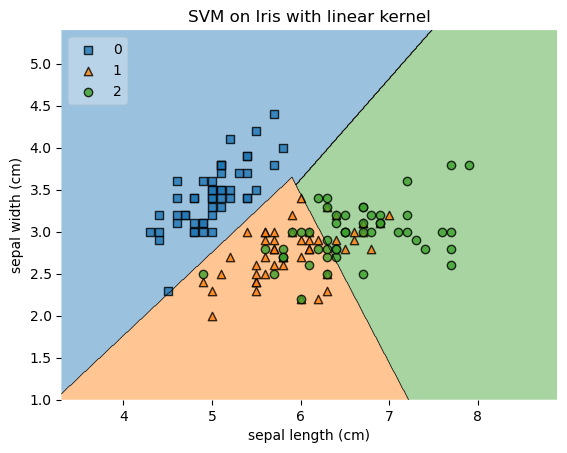

In [2]:
# train SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

# decision regions
plot_decision_regions(X, y, clf=clf, legend=2)

# annotations
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM on Iris with linear kernel')
plt.show()


____

Ok, you have the library working and have a rough idea for what we are going to do today. 
____

____

<font size=+2 color=#AA55FF> Data Preprocessing </font>

____

Write the code to preprocess the data. Think about the conclusions you drew from our use of the Delphi Method: what steps are most important? 
* test-train split?
* scaling?

In particular, given that you now know a little bit about how SVMs work, do you think feature scaling is more or less important than other ML estimators? You might want to draw some pictures (use the whiteboards) to see how "getting the maximum width of the street" could be impacted by the scales.


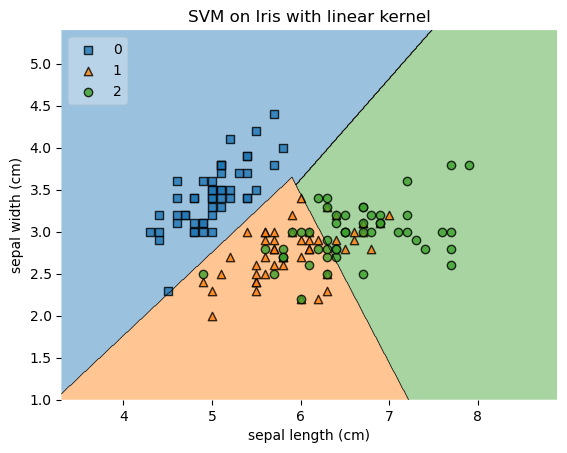

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

# load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we'll only use the first two features for easy visualization; you can vary which two columns to use
y = iris.target

# train SVC
clf = SVC(kernel='linear')
clf.fit(X, y)
# decision regions
plot_decision_regions(X, y, clf=clf, legend=2)

# annotations
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM on Iris with linear kernel')
plt.show()


In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:,:2]  # All features
y = iris.target


# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train SVC
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)

# decision regions
plot_decision_regions(X_train_scaled, y_train, clf=clf, legend=2)

# annotations
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM on Iris with linear kernel')
plt.show()


y_pred = clf.predict(X_test)
classification_report()

By preprocessing the data with a test-train split and feature scaling, we ensure that the SVM model can learn effectively and generalize well to unseen data. Feature scaling, in particular, is crucial for SVMs because it directly impacts the optimization process by ensuring that all features contribute equally to the decision boundary and maximize the margin between classes. We can visualize the impact of feature scaling on SVMs by considering how the decision boundary changes when features are on different scales, potentially affecting the margin width.



____

<font size=+2 color=#AA55FF> Loop Over Kernels </font>

____

Compare many kernels. For example, you can create a list of kernels to loop over, as in `kernels = ['linear', 'poly', 'rbf']` and you can even store the models you generate. That is, you can create many SVM models with different kernels and hold on to them. Explore this code, discuss it, comment it, etc. What exactly is its purpose? 

What type of Python object is `models`? 

In [45]:

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:,:2]  # All features
y = iris.target


# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



kernels = ['linear', 'poly', 'rbf']
models = []

for kernel in kernels:
    svc = SVC(kernel=kernel, C=1.0)
    svc.fit(X_train_scaled, y_train)
    models.append(svc)

    
print(type(models))
print(len(models))

<class 'list'>
3


____

<font size=+2 color=#AA55FF> Visualization of Decision Boundaries </font>

____

Write code with your group to visualize the decision boundaries for all of the models you generated. As a hint, you might use this code, which would nicely show the comparisons:

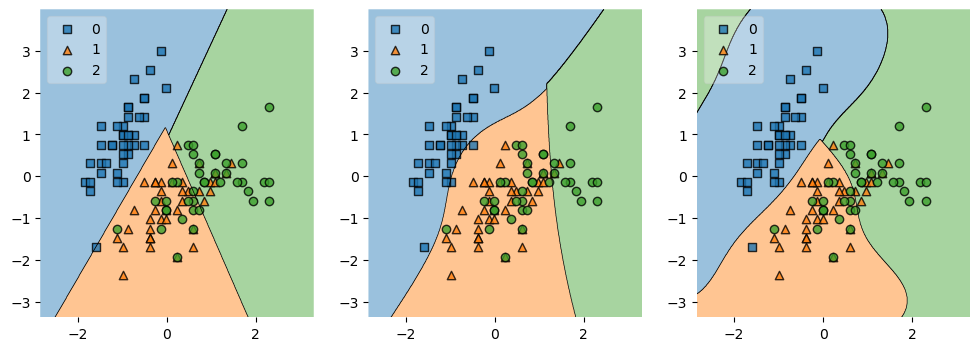

In [46]:
plt.figure(figsize=(12, 4))

for i, model in enumerate(models):
    plt.subplot(1, 3, i + 1)
    plot_decision_regions(X_train_scaled, y_train, clf=model, legend=2)

____

<font size=+2 color=#AA55FF> Hyperparameter Tuning </font>

____

Use `GridSearchCV` to optimize the SVM's hyperparameters, saving the best parameters (`.best_params_`) and the characteristics of the best estimator (`.best_estimator_`). 

You might start with something like this:

As I mentioned in the lecture, the quality of the SVM is often sensitive to the value of _C_. What do you find? 

In [ ]:

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only using the first two features for visualization
y = iris.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameters for GridSearchCV
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100]
}

# Create SVC instance
svc = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Characteristics of the Best Estimator:", best_estimator)


____

<font size=+2 color=#AA55FF> Evaluate the Results </font>

____

From your best SVC, build and visualize confusion matrices. Discuss the decision boundaries and how you can control them. Think of scenarios where you might want to have some expert preference on where the boundary might be. 

Visualize the best SVC with the best hyperparameters in the title of the plot. 

**Repeat all of these steps** by going to the top of the notebook and changing the two columns of iris you have been using. When you change to a slightly different 2D version of the iris dataset, how much do your conclusions change? Put a detailed discussion in a markdown cell. 


<Axes: >

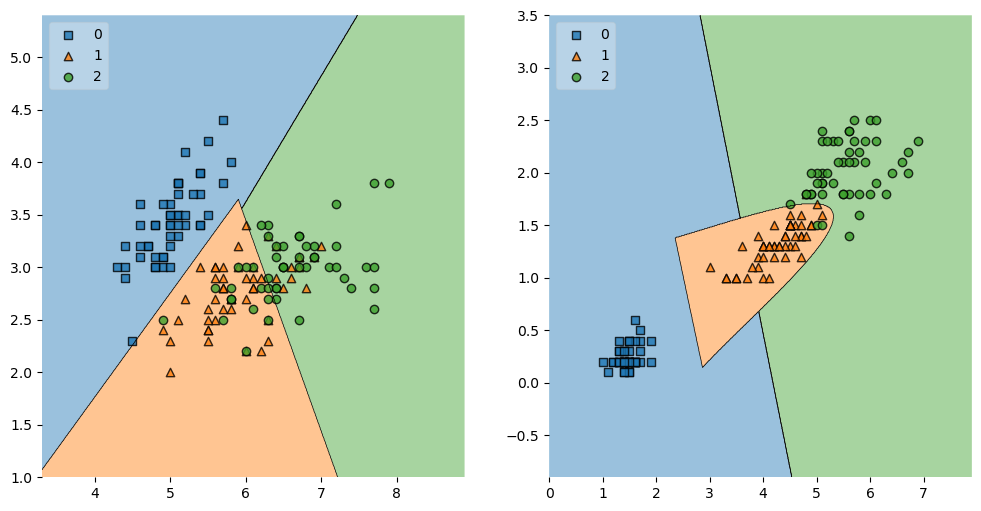

In [16]:
# load the Iris dataset
iris = datasets.load_iris()
X1 = iris.data[:, :2]  # we'll only use the first two features for easy visualization; you can vary which two columns to use
X2 = iris.data[:, 2:]
y1 = iris.target


# train SVC
clf = SVC(kernel='linear',C=1,gamma = 'scale')
clf.fit(X1, y1)
# train SVC
clf1 = SVC(kernel='poly',C = 0.1,gamma = 10)
clf1.fit(X2, y1)
# decision regions
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot_decision_regions(X1, y1, clf=clf, legend=2)
plt.subplot(1,2,2)
plot_decision_regions(X2, y1, clf=clf1, legend=2)

<Axes: >

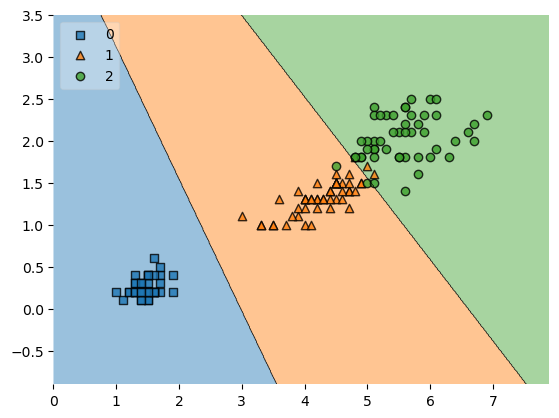